<a href="https://colab.research.google.com/github/marinanastas/telegrams/blob/main/code/macrotopic_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данный код предназначен для проверки первой гипотезы с помощью объединения тем в так называемые "макротемы"; все хорошие новости и поздравления также объединяются в отдельную тему для проверки второй части первой гипотезы

## Загрузка датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/БД все телеграммы_1.xlsx'
df = pd.read_excel(fname)

## Присвоение каждой телеграмме года и десятилетия отправки

In [ ]:
def decade(date):
  if len(date.split('.')) !=3:
      year = 'xxxx'
  else:
      year = date.split('.')[2][:3]
  return year

In [ ]:
df['decade'] = df['date'].apply(decade)

In [ ]:
def year_assignment(date):
  year = ''
  date = str(date)
  if len(date.split('.')) !=3:
   year = 'xxxx'
  else:
    year = date.split('.')[2]
  return year

In [ ]:
df['year'] = df['date'].apply(year_assignment) 

## Объединение всех тем в макротемы и присвоение каждой телеграмме макротемы

In [ ]:
topic_to_topic = {'день рождения':'личные поздравления',
  'поздравление':'личные поздравления',
  'восьмое марта':'государственные праздники',
  'новый год':'государственные праздники',
  'просьба':'будничные телеграммы',
  'требование':'будничные телеграммы',
  'долг':'будничные телеграммы',
  'новости':'будничные телеграммы',
  'свадьба':'личные поздравления',
  'благодарность':'будничные телеграммы',
  'угроза':'будничные телеграммы',
  'предупреждение':'будничные телеграммы',
  'пожелание':'будничные телеграммы',
  'день целинника':'устаревшие праздники',
  'рождение ребенка':'личные поздравления',
  'присвоение звания':'военно-политические',
  'получение награды':'военно-политические',
  'одобрение':'будничные телеграммы',
  'приглашение':'будничные телеграммы',
  'первое мая':'государственные праздники',
  'уведомление':'будничные телеграммы',
  'деньги':'будничные телеграммы',
  'годовщина октябрьской революции':'устаревшие праздники',
  'день города':'государственные праздники',
  'приветствие':'будничные телеграммы',
  'день шахтера':'устаревшие праздники',
  'годовщина советской армии':'устаревшие праздники',
  'трудовое достижение':'личные поздравления',
  'военная':'военно-политические',
  'соболезнование':'будничные телеграммы',
  'вопрос':'будничные телеграммы',
  'девятое мая':'государственные праздники',
  'открытие съезда комсомола':'устаревшие праздники',
  'обещание':'будничные телеграммы',
  'смерть':'будничные телеграммы',
  'начало учебного года':'личные поздравления',
  'манифест':'военно-политические',
  'политика':'военно-политические',
  'осуждение':'будничные телеграммы',
  'вызов':'военно-политические',
  'возражение':'будничные телеграммы',
  'день советской армии':'устаревшие праздники'}

In [ ]:
def topic_to_theme(topic):
  if type(topic) is float:
    topic = 'нет данных'
  tt = 'нет данных'
  topic = topic.split(', ')
  for top in topic:
    if top in topic_to_topic:
      tt = topic_to_topic[top]
  return tt

In [ ]:
df['theme_corr'] = df['theme'].apply(topic_to_theme)

## Подсчёт результатов для каждого десятилетия и каждой макротемы

In [ ]:
results = df['decade'].groupby([df['theme_corr'], df['decade']]).size().to_frame('size')

In [ ]:
results['size']

theme_corr            decade
будничные телеграммы  188        6
                      189       15
                      190       10
                      191       27
                      192       41
                                ..
устаревшие праздники  196        7
                      197        6
                      198        5
                      19x        2
                      xxx        2
Name: size, Length: 64, dtype: int64

In [ ]:
ind = results.index
decades = []
types = []
for i in ind:
  types.append(i[0])
  decades.append(i[1])
sizes = pd.array(results['size'])

In [ ]:
total_plots = pd.DataFrame()
total_plots['types'] = types
total_plots['decades'] = decades
total_plots['size'] = sizes

## Подготовка данных для графика

In [ ]:
neon = pd.DataFrame()
neq = list(total_plots['decades'].unique())
neon['decade'] = neq
neon = neon.sort_values(by = 'decade')

In [ ]:
final_dataset = pd.DataFrame()
final_dataset['decade'] = neon['decade']

In [ ]:
final_dataset

,decade
15,187
0,188
1,189
2,190
3,191
4,192
5,193
6,194
7,195
8,196


In [ ]:
mundane = total_plots[total_plots['types'] == 'будничные телеграммы']
old = total_plots[total_plots['types'] == 'устаревшие праздники']
personal = total_plots[total_plots['types'] == 'личные поздравления']
govern = total_plots[total_plots['types'] == 'государственные праздники']
politics = total_plots[total_plots['types'] == 'военно-политические']

In [ ]:
def casesearch(k, frame, i):
  i = 0
  try:
    i = int(frame[frame['decades'] == k]['size'])
  except:
    i = 0
  #print(i)
  return i

In [ ]:
groups =['old', 'mundane', 'personal', 'govern', 'politics']

In [ ]:
final_dataset['old'] = final_dataset['decade'].apply(casesearch, args = (old, 0))
final_dataset['mundane'] = final_dataset['decade'].apply(casesearch, args = (mundane, 0))
final_dataset['personal'] = final_dataset['decade'].apply(casesearch, args = (personal, 0))
final_dataset['govern'] = final_dataset['decade'].apply(casesearch, args = (govern, 0))
final_dataset['politics'] = final_dataset['decade'].apply(casesearch, args = (politics, 0))
final_dataset.set_index('decade')

,old,mundane,personal,govern,politics
decade,,,,,
187,0,0,0,0,34
188,0,6,0,0,0
189,0,15,0,0,0
190,0,10,0,0,2
191,0,27,1,0,4
192,0,41,1,0,0
193,0,63,14,2,70
194,3,94,29,13,159
195,3,13,16,3,97


## График

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
neon = pd.DataFrame({'old': list(final_dataset['old']),
                  'mundane': list(final_dataset['mundane']),                  
                  'personal': list(final_dataset['personal']),
                  'govern': list(final_dataset['govern']), 
                  'politics': list(final_dataset['politics']), 
                  }, index=neq)

In [ ]:
neon = neon.sort_index()

In [ ]:
neon

,old,mundane,personal,govern,politics
187,0,2,16,1,0
188,0,0,0,0,34
189,0,6,0,0,0
190,0,15,0,0,0
191,0,10,0,0,2
192,0,27,1,0,4
193,0,41,1,0,0
194,0,63,14,2,70
195,3,94,29,13,159
196,3,13,16,3,97


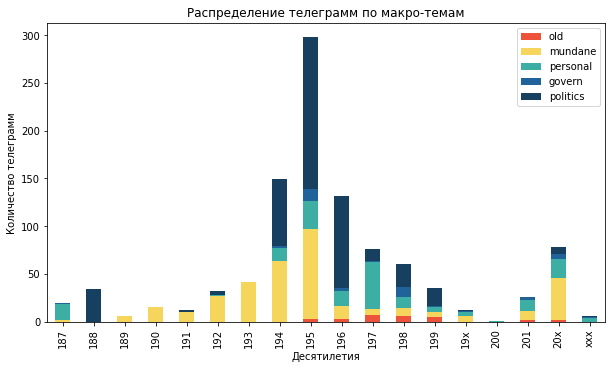

In [ ]:
# create stacked bar chart for monthly temperatures
neon.plot(kind='bar', stacked=True, color=['#ED533B', '#F6D55C', '#3CAEA3', '#20639B', '#173F5F'])
 
# labels for x & y axis
plt.xlabel('Десятилетия')
plt.ylabel('Количество телеграмм')
 
# title of plot
plt.title('Распределение телеграмм по макро-темам')
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/macrotopic')